In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

Clean Data

In [2]:
# Save path to CSV file as variable
data_file = Path("Resources/us_births_2016_2021.csv")

In [3]:
# Read CSV file using Pandas
data_file_df = pd.read_csv(data_file)
data_file_df

State State Abbreviation  Year Gender  \
0     Alabama                 AL  2016      F   
1     Alabama                 AL  2016      F   
2     Alabama                 AL  2016      F   
3     Alabama                 AL  2016      F   
4     Alabama                 AL  2016      F   
...       ...                ...   ...    ...   
5491  Wyoming                 WY  2021      M   
5492  Wyoming                 WY  2021      M   
5493  Wyoming                 WY  2021      M   
5494  Wyoming                 WY  2021      M   
5495  Wyoming                 WY  2021      M   

                              Education Level of Mother  Education Level Code  \
0                                     8th grade or less                     1   
1                9th through 12th grade with no diploma                     2   
2                 High school graduate or GED completed                     3   
3                 Some college credit, but not a degree                     4   
4                             Associate degree (AA, AS)                     5   
...                                                 ...                   ...   
5491                          Associate degree (AA, AS)                     5   
5492                     Bachelor's degree (BA, AB, BS)                     6   
5493      Master's degree (MA, MS, MEng, MEd, MSW, MBA)                     7   
5494  Doctorate (PhD, EdD) or Professional Degree (M...                     8   
5495                              Unknown or Not Stated                    -9   

      Number of Births  Average Age of Mother (years)  \
0                 1052                           27.8   
1                 3436                           24.1   
2                 8777                           25.4   
3                 6453                           26.7   
4                 2227                           28.9   
...                ...                            ...   
5491               401                           29.2   
5492               657                           30.7   
5493               261                           33.0   
5494                72                           33.3   
5495                41                           29.2   

      Average Birth Weight (g)  
0                       3116.9  
1                       3040.0  
2                       3080.0  
3                       3121.9  
4                       3174.3  
...                        ...  
5491                    3261.1  
5492                    3286.0  
5493                    3249.3  
5494                    3262.0  
5495                    3177.5  

[5496 rows x 9 columns]

In [4]:
data_file_df.head()

State State Abbreviation  Year Gender  \
0  Alabama                 AL  2016      F   
1  Alabama                 AL  2016      F   
2  Alabama                 AL  2016      F   
3  Alabama                 AL  2016      F   
4  Alabama                 AL  2016      F   

                Education Level of Mother  Education Level Code  \
0                       8th grade or less                     1   
1  9th through 12th grade with no diploma                     2   
2   High school graduate or GED completed                     3   
3   Some college credit, but not a degree                     4   
4               Associate degree (AA, AS)                     5   

   Number of Births  Average Age of Mother (years)  Average Birth Weight (g)  
0              1052                           27.8                    3116.9  
1              3436                           24.1                    3040.0  
2              8777                           25.4                    3080.0  
3              6453                           26.7                    3121.9  
4              2227                           28.9                    3174.3

In [5]:
# Check the data types of each column
data_file_df.dtypes

State                             object
State Abbreviation                object
Year                               int64
Gender                            object
Education Level of Mother         object
Education Level Code               int64
Number of Births                   int64
Average Age of Mother (years)    float64
Average Birth Weight (g)         float64
dtype: object

In [6]:
# Check for missing values in each column
data_file_df.isnull().sum()

State                            0
State Abbreviation               0
Year                             0
Gender                           0
Education Level of Mother        0
Education Level Code             0
Number of Births                 0
Average Age of Mother (years)    0
Average Birth Weight (g)         0
dtype: int64

In [7]:
# Check for duplicate rows
data_file_df.duplicated().sum()

0

In [8]:
# Combined info on each of the columns
data_file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          5496 non-null   object 
 1   State Abbreviation             5496 non-null   object 
 2   Year                           5496 non-null   int64  
 3   Gender                         5496 non-null   object 
 4   Education Level of Mother      5496 non-null   object 
 5   Education Level Code           5496 non-null   int64  
 6   Number of Births               5496 non-null   int64  
 7   Average Age of Mother (years)  5496 non-null   float64
 8   Average Birth Weight (g)       5496 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 386.6+ KB


In [9]:
# Perform summary statistics on numeric columns
data_file_df.describe()

Year  Education Level Code  Number of Births  \
count  5496.000000           5496.000000       5496.000000   
mean   2018.500728              3.026201       4115.443959   
std       1.707554              4.733406       6687.036797   
min    2016.000000             -9.000000         10.000000   
25%    2017.000000              2.000000        559.000000   
50%    2019.000000              4.000000       1692.000000   
75%    2020.000000              6.000000       5140.000000   
max    2021.000000              8.000000      59967.000000   

       Average Age of Mother (years)  Average Birth Weight (g)  
count                    5496.000000               5496.000000  
mean                       29.552274               3250.887627  
std                         2.779735                114.456090  
min                        23.100000               2451.900000  
25%                        27.500000               3182.200000  
50%                        29.600000               3256.000000  
75%                        31.800000               3330.825000  
max                        35.500000               3585.700000

1. Number of Births Per State

In [10]:
# Calculate the number of births per state
births_per_state = data_file_df.groupby('State', as_index =False)['Number of Births'].sum()
births_per_state

State  Number of Births
0                Alabama            350169
1                 Alaska             60398
2                Arizona            481353
3               Arkansas            220592
4             California           2702751
5               Colorado            381192
6            Connecticut            209349
7               Delaware             63904
8   District of Columbia             55243
9                Florida           1316127
10               Georgia            758374
11                Hawaii            100750
12                 Idaho            132089
13              Illinois            854265
14               Indiana            486328
15                  Iowa            226216
16                Kansas            215309
17              Kentucky            321074
18             Louisiana            357517
19                 Maine             72617
20              Maryland            422874
21         Massachusetts            415810
22              Michigan            651713
23             Minnesota            399583
24           Mississippi            219550
25              Missouri            431873
26               Montana             68657
27              Nebraska            151526
28                Nevada            210109
29         New Hampshire             72633
30            New Jersey            604156
31            New Mexico            137752
32              New York           1331877
33        North Carolina            715779
34          North Dakota             63381
35                  Ohio            803494
36              Oklahoma            297782
37                Oregon            253946
38          Pennsylvania            810372
39          Rhode Island             62682
40        South Carolina            340967
41          South Dakota             70080
42             Tennessee            483430
43                 Texas           2278104
44                  Utah            285498
45               Vermont             32721
46              Virginia            590697
47            Washington            516044
48         West Virginia            108659
49             Wisconsin            381333
50               Wyoming             39781

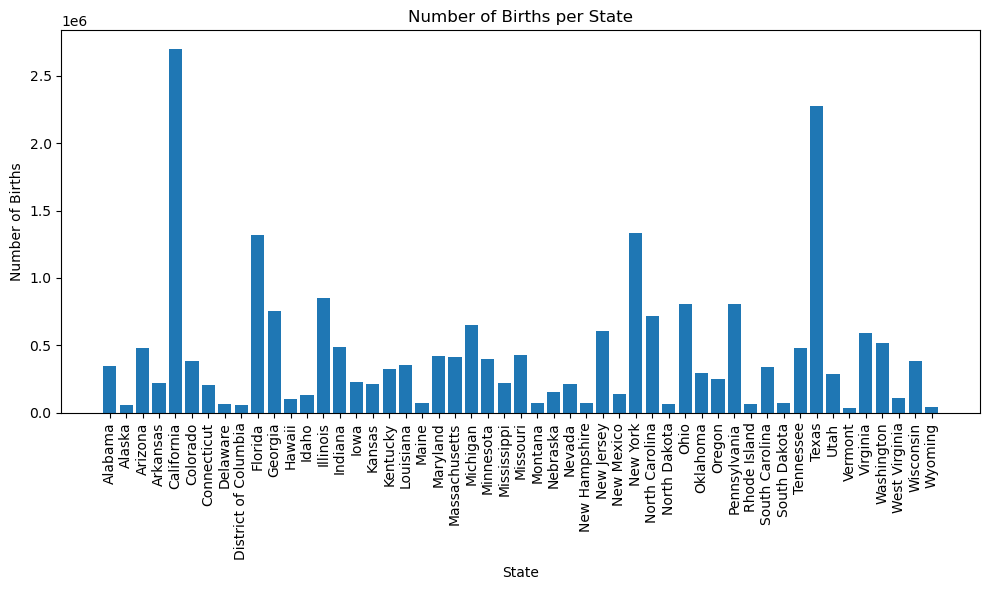

In [11]:
# Create a bar plot of the number of births per state
plt.figure(figsize=(10, 6))
plt.bar(births_per_state['State'],births_per_state['Number of Births'])
plt.xlabel('State')
plt.ylabel('Number of Births')
plt.title('Number of Births per State')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the figure
plt.savefig('Images/1_number_of_births_per_state.png')

In [12]:
# Calculate Statistics
print(f"The mean number of births per all states: {round(births_per_state['Number of Births'].mean(),2)}")
print(f"The standard deviation is: {round(births_per_state['Number of Births'].std(),2)}")

The mean number of births per all states: 443499.61
The standard deviation is: 515639.17


2. Number of Births Per Gender Per State

In [13]:
# Filter main dataframe by State, Gender, and Number of Births
births_per_gender_per_state = data_file_df.groupby(['State', 'Gender'])['Number of Births'].sum().reset_index()
births_per_gender_per_state

State Gender  Number of Births
0          Alabama      F            170911
1          Alabama      M            179258
2           Alaska      F             29296
3           Alaska      M             31102
4          Arizona      F            235677
..             ...    ...               ...
97   West Virginia      M             55567
98       Wisconsin      F            186425
99       Wisconsin      M            194908
100        Wyoming      F             19357
101        Wyoming      M             20424

[102 rows x 3 columns]

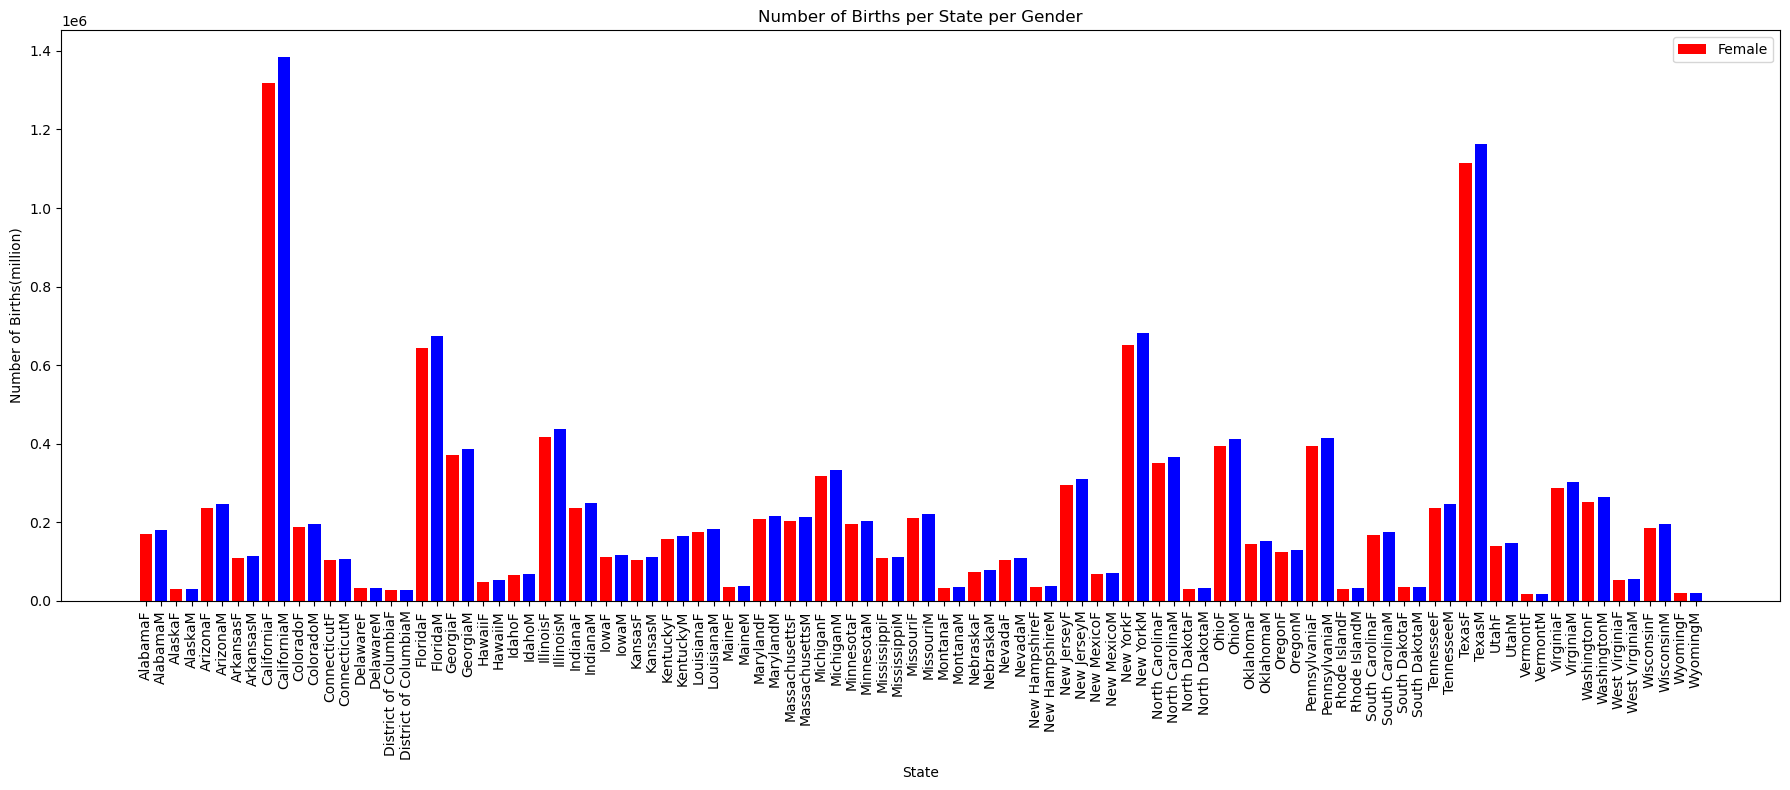

In [31]:
# Visualize the number of births per gender per state
births_per_gender_per_state = pd.DataFrame({
    'State': (births_per_gender_per_state.iloc[:, 0]),
    'Gender':(births_per_gender_per_state.iloc[:, 1]),
    'Number of Births':(births_per_gender_per_state.iloc[:, 2])
})

colors = ['red', 'blue']
female = births_per_gender_per_state[births_per_gender_per_state['Gender'] == 'Female']
male = births_per_gender_per_state[births_per_gender_per_state['Gender'] == 'Male']

#Create bar chart
plt.figure(figsize=(18, 8))
plt.bar((births_per_gender_per_state['State'] + births_per_gender_per_state['Gender']), births_per_gender_per_state['Number of Births'], color=colors)
plt.xlabel('State')
plt.ylabel('Number of Births(million)')
plt.title('Number of Births per State per Gender')
plt.legend(["Female", "Male"])
plt.xticks(rotation=90)
plt.tight_layout() 

# Save the figure
plt.savefig('Images/2_number_of_births_per_gender_per_state.png')

plt.show()

In [15]:
# Calculate statistics
print(f"The mean number of births over all States and genders is: {round(births_per_gender_per_state['Number of Births'].mean(),2)}")
print(f"The standard deviation for number of births over all States and genders is: {round(births_per_gender_per_state['Number of Births'].std(),2)}")

The mean number of births over all States and genders is: 221749.8
The standard deviation for number of births over all States and genders is: 256658.23


3. Average Birth Weight (g) Per State

In [16]:
# Find the average birth weight per state

# Use .groupby to group states
# Use .aggregate to find the mean birth weight for each state
# Sort the values from least to greatest
# Round values to nearest whole number
avg_weight_df = data_file_df.groupby("State").aggregate({"Average Birth Weight (g)": "mean"}).sort_values(by = "Average Birth Weight (g)", ascending = True).round()
avg_weight_df

Average Birth Weight (g)
State                                         
Mississippi                             3137.0
Louisiana                               3169.0
Wyoming                                 3169.0
District of Columbia                    3171.0
New Mexico                              3171.0
Colorado                                3174.0
Alabama                                 3195.0
Georgia                                 3199.0
South Carolina                          3208.0
Hawaii                                  3209.0
Nevada                                  3212.0
Texas                                   3216.0
West Virginia                           3221.0
Arkansas                                3226.0
Florida                                 3227.0
Delaware                                3230.0
New York                                3236.0
Utah                                    3237.0
Maryland                                3239.0
North Carolina                          3239.0
Ohio                                    3240.0
Oklahoma                                3242.0
Tennessee                               3242.0
New Jersey                              3244.0
Connecticut                             3249.0
Illinois                                3250.0
Arizona                                 3253.0
Missouri                                3254.0
Michigan                                3256.0
Pennsylvania                            3257.0
Virginia                                3257.0
Montana                                 3261.0
Kentucky                                3265.0
Indiana                                 3266.0
Rhode Island                            3271.0
Massachusetts                           3274.0
California                              3279.0
Idaho                                   3280.0
Nebraska                                3281.0
Wisconsin                               3292.0
Kansas                                  3293.0
South Dakota                            3305.0
Vermont                                 3309.0
New Hampshire                           3312.0
Oregon                                  3313.0
Maine                                   3314.0
North Dakota                            3320.0
Washington                              3322.0
Minnesota                               3326.0
Iowa                                    3329.0
Alaska                                  3359.0

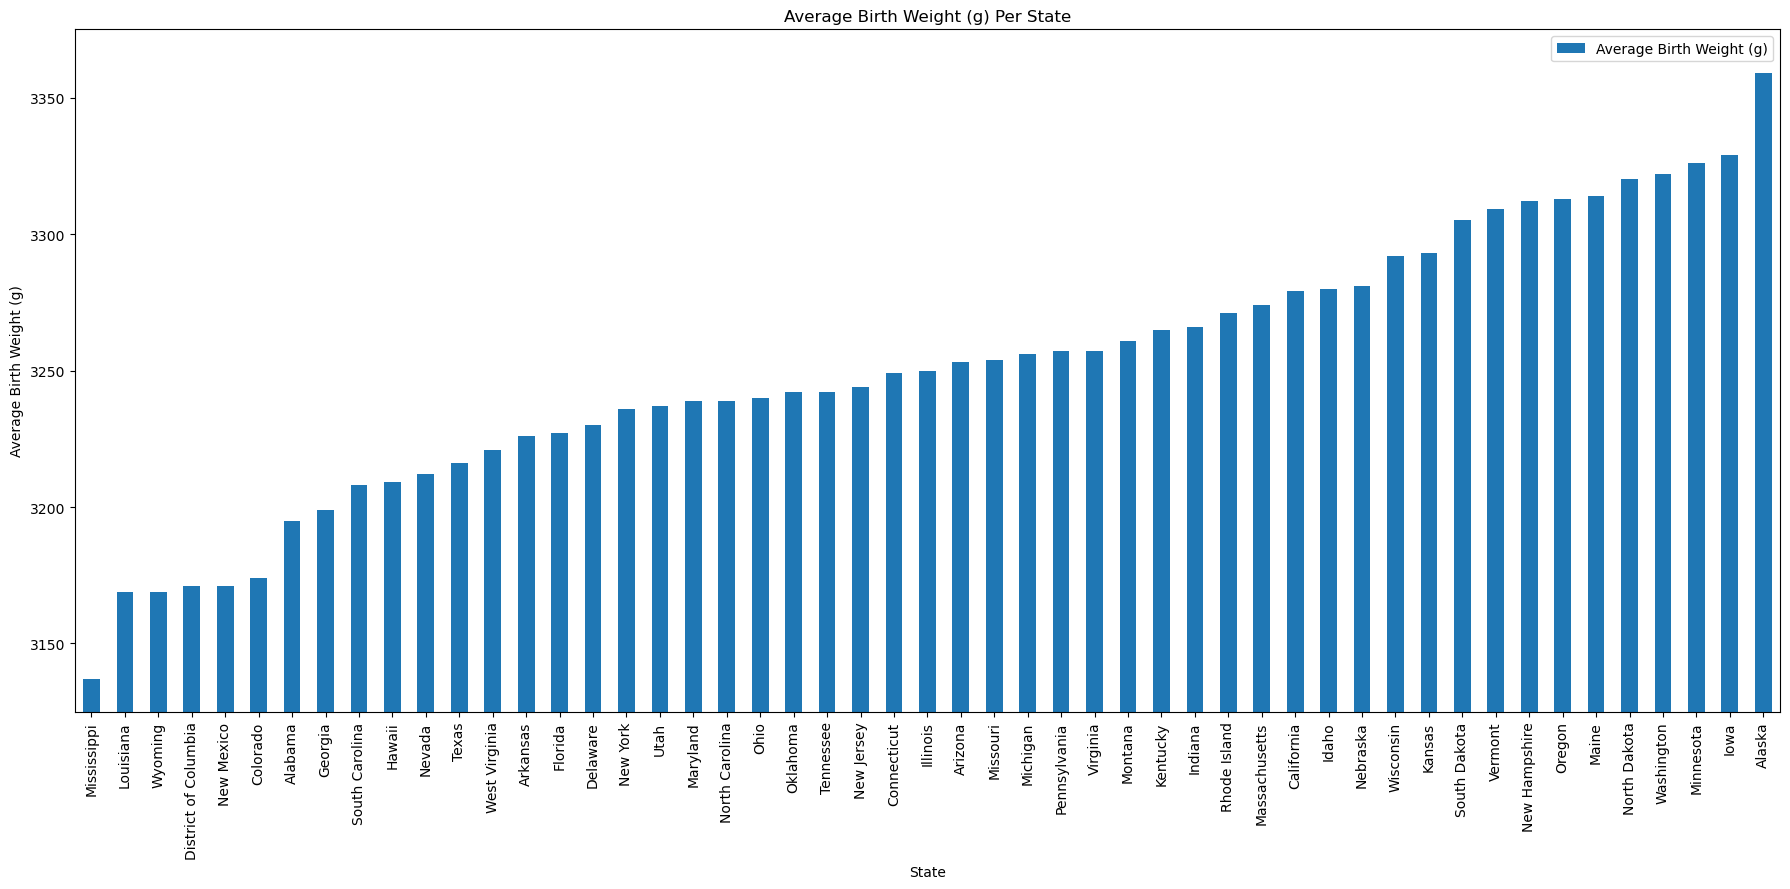

In [17]:
# Create bar graph visualizing filtered dataframe
weight_chart = avg_weight_df.plot(kind = "bar", figsize = (18,9))
plt.ylim(3125, 3375)

# Set title and axes labels
plt.title("Average Birth Weight (g) Per State")
plt.xlabel("State")
plt.ylabel("Average Birth Weight (g)")

# Adjust figure size
plt.tight_layout()

# Save and export figure to Images folder
plt.savefig("Images/3_avg_weight_per_state.png")

# Show completed figure
plt.show()

In [18]:
# Calculate statistics
print(f"The mean baby weight over all States is: {round(avg_weight_df['Average Birth Weight (g)'].mean(),2)}")
print(f"The standard deviation for baby weight over all States is: {round(avg_weight_df['Average Birth Weight (g)'].std(),2)}")

The mean baby weight over all States is: 3250.98
The standard deviation for baby weight over all States is: 48.88


4. Average Birth Weight (g) Per Average Age of the Mother

In [19]:
# Round age
data_file_df['Average Age of Mother (years)'] = data_file_df['Average Age of Mother (years)'].astype(float).astype(int)
data_file_df

State State Abbreviation  Year Gender  \
0     Alabama                 AL  2016      F   
1     Alabama                 AL  2016      F   
2     Alabama                 AL  2016      F   
3     Alabama                 AL  2016      F   
4     Alabama                 AL  2016      F   
...       ...                ...   ...    ...   
5491  Wyoming                 WY  2021      M   
5492  Wyoming                 WY  2021      M   
5493  Wyoming                 WY  2021      M   
5494  Wyoming                 WY  2021      M   
5495  Wyoming                 WY  2021      M   

                              Education Level of Mother  Education Level Code  \
0                                     8th grade or less                     1   
1                9th through 12th grade with no diploma                     2   
2                 High school graduate or GED completed                     3   
3                 Some college credit, but not a degree                     4   
4                             Associate degree (AA, AS)                     5   
...                                                 ...                   ...   
5491                          Associate degree (AA, AS)                     5   
5492                     Bachelor's degree (BA, AB, BS)                     6   
5493      Master's degree (MA, MS, MEng, MEd, MSW, MBA)                     7   
5494  Doctorate (PhD, EdD) or Professional Degree (M...                     8   
5495                              Unknown or Not Stated                    -9   

      Number of Births  Average Age of Mother (years)  \
0                 1052                             27   
1                 3436                             24   
2                 8777                             25   
3                 6453                             26   
4                 2227                             28   
...                ...                            ...   
5491               401                             29   
5492               657                             30   
5493               261                             33   
5494                72                             33   
5495                41                             29   

      Average Birth Weight (g)  
0                       3116.9  
1                       3040.0  
2                       3080.0  
3                       3121.9  
4                       3174.3  
...                        ...  
5491                    3261.1  
5492                    3286.0  
5493                    3249.3  
5494                    3262.0  
5495                    3177.5  

[5496 rows x 9 columns]

In [20]:
# Group columns of interest
mothers_age = data_file_df.groupby("Average Age of Mother (years)").agg({'Average Birth Weight (g)':"mean"}).sort_values(by='Average Age of Mother (years)').round()
mothers_age

Average Birth Weight (g)
Average Age of Mother (years)                          
23                                               3122.0
24                                               3146.0
25                                               3171.0
26                                               3208.0
27                                               3217.0
28                                               3217.0
29                                               3237.0
30                                               3285.0
31                                               3308.0
32                                               3324.0
33                                               3311.0
34                                               3286.0
35                                               3311.0

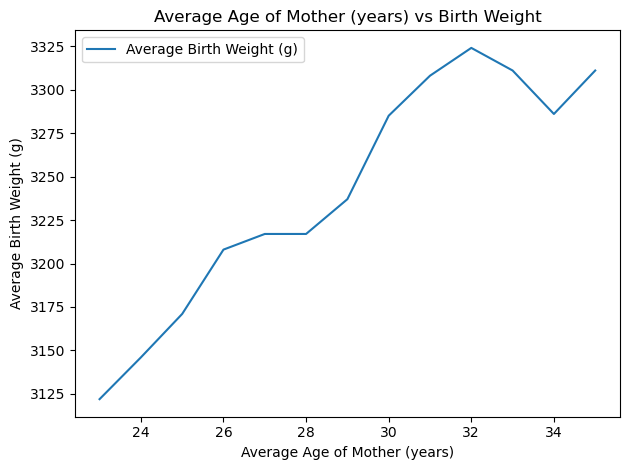

In [21]:
# Create line chart
age_line = mothers_age.plot(kind='line')
plt.xlabel('Average Age of Mother (years)')
plt.ylabel('Average Birth Weight (g)')
plt.title('Average Age of Mother (years) vs Birth Weight')
plt.tight_layout()

plt.savefig("Images/4_avg_birth_weight_per_age.png")
plt.show()

In [22]:
# Calculate statistics
print(f"The mean birth weight across all genders, states, and mother age is: {round(mothers_age['Average Birth Weight (g)'].mean(),2)}")
print("* Note: This mean is different from the one calculated above in 'Average Birth Weight (g) Per State' because we are grouping by a different column (Average Age of the Mother) with significantly less values for baby weight. However, these two averages are still extremely close together, which doesn't suggest any impeding outside factors.")
print(f"The standard deviation for number of births over all States and genders is: {round(mothers_age['Average Birth Weight (g)'].std(),2)}")

The mean birth weight across all genders, states, and mother age is: 3241.77
* Note: This mean is different from the one calculated above in 'Average Birth Weight (g) Per State' because we are grouping by a different column (Average Age of the Mother) with significantly less values for baby weight. However, these two averages are still extremely close together, which doesn't suggest any impeding outside factors.
The standard deviation for number of births over all States and genders is: 67.99


5. Average Baby Weight Per Gender

In [23]:
# Perform value counts on categorical columns
data_file_df['State'].value_counts()
data_file_df['Gender'].value_counts()

M    2749
F    2747
Name: Gender, dtype: int64

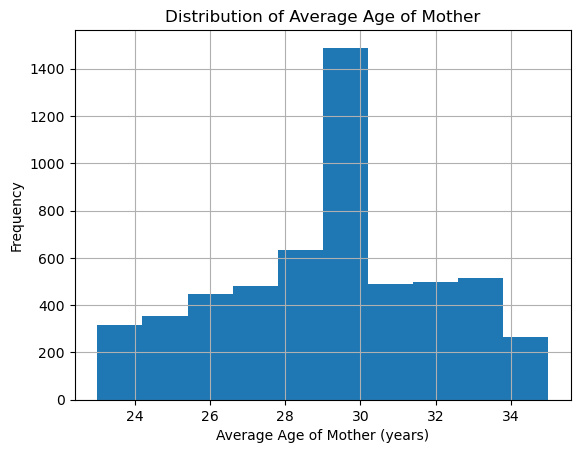

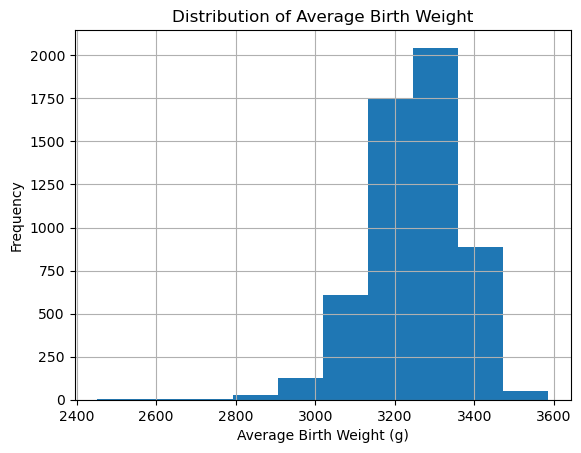

In [24]:
# Plot histograms of numeric columns
data_file_df['Average Age of Mother (years)'].hist()
plt.xlabel('Average Age of Mother (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Age of Mother')
# Save the figure
plt.savefig('Images/5a_Distribution_of_Average_Age_of_Mother.png')
plt.show()


data_file_df['Average Birth Weight (g)'].hist()
plt.xlabel('Average Birth Weight (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Birth Weight')
plt.savefig('Images/5b_Distribution_of_Average_Birth_Weight.png')
plt.show()

In [25]:
# Count the total number of columns entries in the DataFrame
column_entries_count = data_file_df.count()

column_entries_count

State                            5496
State Abbreviation               5496
Year                             5496
Gender                           5496
Education Level of Mother        5496
Education Level Code             5496
Number of Births                 5496
Average Age of Mother (years)    5496
Average Birth Weight (g)         5496
dtype: int64

In [26]:
# Calculate the average weight per gender
average_weight_per_gender = data_file_df.groupby('Gender')['Average Birth Weight (g)'].mean()

# Rename the column to 'Average Birth Weight (LB)'
average_weight_per_gender = average_weight_per_gender.rename('Average Birth Weight (LB)')
average_weight_per_gender

Gender
F    3194.575173
M    3307.159112
Name: Average Birth Weight (LB), dtype: float64

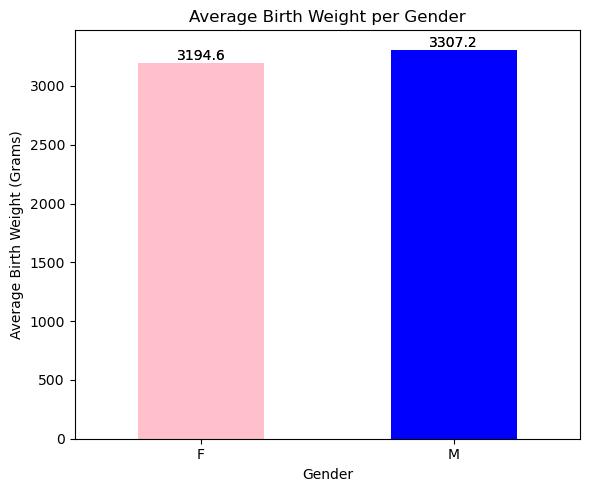

In [27]:
# Visualize the average weight per gender using a bar plot
plt.figure(figsize=(6, 5))
ax = average_weight_per_gender.plot(x='Gender', y='Average Birth Weight (g)', kind='bar', color=['pink', 'blue'])

average_weight_per_gender.plot(x='Gender', y='Average Birth Weight (g)', kind='bar', color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Average Birth Weight (Grams)')
plt.title('Average Birth Weight per Gender')
plt.tight_layout()
plt.xticks(rotation=360)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Save the figure
plt.savefig('Images/5c_average_weight_per_gender.png')

plt.show()

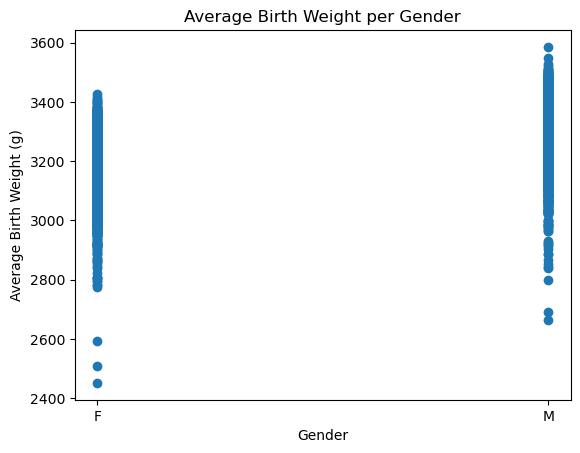

In [28]:
import matplotlib.pyplot as plt

# Extract the relevant data for scatter plot
gender = data_file_df['Gender']
birth_weight = data_file_df['Average Birth Weight (g)']

# Create the scatter plot
plt.scatter(gender, birth_weight)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Average Birth Weight (g)')
plt.title('Average Birth Weight per Gender')

# Save the figure
plt.savefig('Images/5d_average_weight_per_gender_scatter.png')

# Display the plot
plt.show()

6. Average Baby Weight Per Mother's Education Level

In [29]:
# Place education level into list for for loop
edu_level = ["8th grade or less", "9th through 12th grade with no diploma", "High school graduate or GED completed", 
             "Some college credit, but not a degree", "Associate degree (AA, AS)",
             "Bachelor's degree (BA, AB, BS)", "Master's degree (MA, MS, MEng, MEd, MSW, MBA)", 
             "Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD", "Unknown or Not Stated"]

# Empty list for IQR
weight_data = []

# Calculate IQR and determine outliers
for edu_level in edu_level:
    avg_weight = data_file_df.loc[data_file_df["Education Level of Mother"] == edu_level, "Average Birth Weight (g)"]
    quartiles = avg_weight.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Subset
    weight_data.append(avg_weight)
    
    # Upper & lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

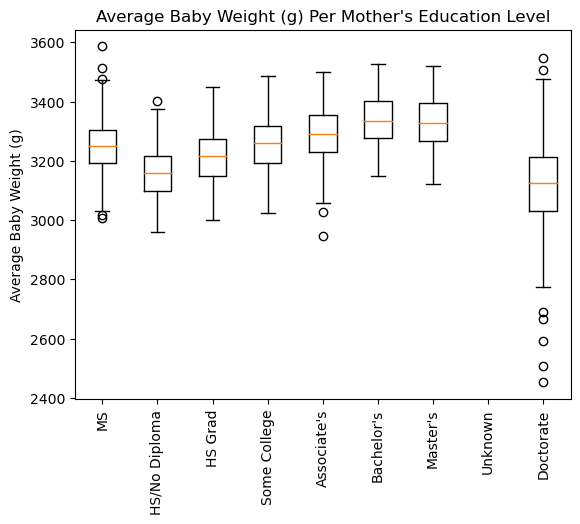

In [30]:
# Generate boxplot
plt.boxplot(weight_data)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ["MS", "HS/No Diploma", "HS Grad", "Some College", "Associate's",
                                         "Bachelor's", "Master's", "Unknown", "Doctorate"], rotation = 90)
plt.title("Average Baby Weight (g) Per Mother's Education Level")
plt.ylabel("Average Baby Weight (g)")
plt.savefig("Images/6_avg_birth_weight_per_edu_level.png")
plt.show()